#선형회귀 실습
##처음부터 작성하기


In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm

path = "/content/drive/My Drive/Colab Notebooks/assignment-02/data.csv"
train_set = np.genfromtxt(path, delimiter=',')


m = train_set.shape[0]



02번 숙제와 같은 nparray를 쓰고 있으므로 그냥 바로 씁니다.  
정체미상의 데이터들입니다. $$[[x_1,y_1],...]$$

# Input points [2pt]

1. plot a set of points $ \{(x^{(i)}, y^{(i)})\}$ that are loaded from 'data.csv' file (in black color)

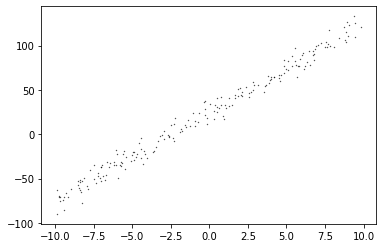

In [4]:
plt.scatter(train_set[:,0],train_set[:,1], c="black", s=0.1)
plt.show()

# Linear regression
모델은 다음과 같다.
$$ h_\theta​(x)=\theta_0​+\theta_1​x $$
cost는 다음과 같다.
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}​(h_\theta​(x^{(i)})−y^{(i)})^{2} $$

적당히 [-100,100]에서 무작위로 $ \theta_0​, \theta_1$ 을 고른다.  


함수 h(th0, th1, x)를 정의하여 편의를 위해 사용한다.  
J 함수로 오차를 일단 생각해본다.  
역시 오차가 이상하므로 GD를 시작한다.

$$ \theta_0(t+1)​ := \theta_0(t)​−α​\frac{1}{m}\sum_{i=1}^{m}​(h_θ​(x^{(i)})−y^{(i)}) $$
$$ \theta_1(t+1) := \theta_1(t)−α\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})−y^{(i)})x^{(i)}$$

이것을 바탕으로 다음 $\theta$를 정해봅니다.



In [5]:
g_th0 = rd.uniform(-100,100)
g_th1 = rd.uniform(-100,100)
alpha = 0.01


def h(th0, th1, x):
    return th0 + th1*x

def J(th0, th1):
    sum = 0
    for i in range(m):
        # train_set[i,0] ith row, x-axis
        sum = sum + ((h(th0, th1, train_set[i,0]) - train_set[i,1]) ** 2)
    return (1/(2*m)) * sum

def th0_cal(th0, th1):
    sum = 0
    for i in range(m):
        sum = sum + (h(th0, th1, train_set[i,0]) - train_set[i,1])
    return (1/m) * sum

def th1_cal(th0, th1):
    sum = 0
    for i in range(m):
        sum = sum + ((h(th0, th1, train_set[i,0]) - train_set[i,1]) * train_set[i,0])
    return (1/m) * sum

J_log = [J(g_th0, g_th1)]
th0_log = [g_th0]
th1_log = [g_th1]

# import sys
e = 5*10 ** (-6)
from tqdm import tqdm, trange

for i in tqdm(range(550000)):
    temp0 = g_th0-alpha*(1/m)* th0_cal(g_th0, g_th1)
    temp1 = g_th1-alpha*(1/m)* th1_cal(g_th0, g_th1)
    g_th0 = temp0
    g_th1 = temp1
    J_log.append(J(g_th0, g_th1))
    th0_log.append(g_th0)
    th1_log.append(g_th1)
    if abs(J(g_th0, g_th1)) < 1 and abs(g_th0 - th0_log[-2]) <= e and abs(g_th1 - th1_log[-2]) <= e and abs(J(g_th0, g_th1) - J_log[-2]) <=e:
        break


print("\ng_th0 : ", g_th0, "g_th1 : ", g_th1, "cost : ", J(g_th0, g_th1))


100%|██████████| 550000/550000 [08:04<00:00, 1135.21it/s]


g_th0 :  24.907393294017762 g_th1 :  9.934635539222944 cost :  27.467506725904556


# 코드 구조의 설명
학습율은 0.01로 하면, 초기 검사에서 적합하다는 사실을 얻었습니다.
(발산하지 않는 정도에서 적당히 컸음)

the optimization should be performed until convergence 라는 조건문을 보고
모든 변화율이 특정 값 아래로 떨어지면 정지시키려고 하였습니다.

if abs(J(g_th0, g_th1)) < 1 and abs(g_th0 - th0_log[-2]) <= e and abs(g_th1 - th1_log[-2]) <= e and abs(J(g_th0, g_th1) - J_log[-2]) <=e:를 조건으로 사용하려고 하였습니다만, (기울기가 더 이상 변하지 않는 것)
(단 e는 시스템의 float의 입실론값)

언제 멈출 지 모르기도 하고, 진행사항을 확인하기가 너무 어려워, 
250,000 회 반복해서, 진행사항을 확인했습니다.
아직 bias가 학습되지 않았으므로 
적당히 돌아갈 수 있는 크기인
350,000 회로 설정하여 테스트합니다.

g_th0 :  2.4751128432339686 g_th1 :  0.9963501834570437 cost :  3.5559549191289355

코스트가 3~4 이였습니다.

적당하다고 생각해서 

abs(J(g_th0, g_th1) - J_log[-2]) 등의 값을 조사하여보니
7.304113649730937e-05 등의 값을 얻었습니다.

그래서 e 값을 $$ 5*10^{-6}$$
으로 두고 이때의 변화율에 도달한다면, 프로그램을 정지시키도록 하였습니다.

최종적으로 550,000 번을 돌고, 중간에 e 이하로 학습 변화율이 떨어진다면 정지시키도록 하였습니다.




In [6]:
print(abs(J(g_th0, g_th1)))
print(abs(g_th0 - th0_log[-2]))
print(abs(g_th1 - th1_log[-2]))
print(abs(J(g_th0, g_th1) - J_log[-2]))

27.467506725904556
3.552713678800501e-15
0.0
0.0


# linear regression result [3pt]


1. plot a set of points $\{ (x^{(i)}, y^{(i)}) \}$that are loaded from 'data.csv' file (in black color)
2. plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)
3. the estimated straight line (linear function) is superimposed on the set of points

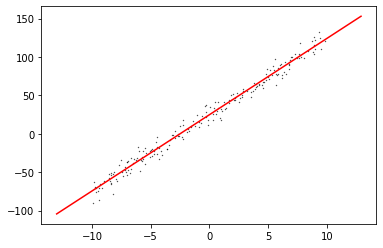

In [7]:
plt.scatter(train_set[:,0],train_set[:,1], c="black", s=0.1)

x_plot_data = np.arange(-13,13,0.1)
y_plot_data = g_th0 + x_plot_data * g_th1

plt.plot(x_plot_data,y_plot_data,'r-')

plt.show()

# Plot the energy surface [4pt]


1. plot the energy surface $(\theta_0, \theta_1, J(\theta_0, \theta_1) $with the range of variables $\theta_0 = [-30 : 0.1 : 30]$ and $\theta_1 = [-30 : 0.1 : 30] $

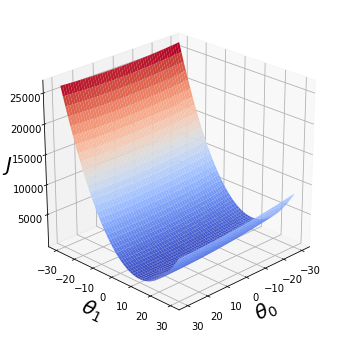

In [64]:
X = np.arange(-30,30,0.1)
Y = np.arange(-30,30,0.1)
X, Y = np.meshgrid(X, Y)
Z = np.array([J(th0, th1) for th0,th1 in zip(X,Y)])
# zip이 O(len(X or Y)) 이라고 생각하고, 모든 점을 순회하지 않는다고 생각했겠지만
# 이미 모든 점을 나열해놓은 것이기 때문에, O(len(X or Y)) = O(n x n)

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

ax.set_xlabel(r'$\theta_0​$', fontsize=20)
ax.set_ylabel(r'$\theta_1$', fontsize=20)
ax.set_zlabel(r'$J$', fontsize=20)
# 앞에 r을 붙여주면 라텍스로 읽는다.

ax.view_init(25, 45)
# 시점 설정
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True)

plt.show()


위에서는 데이터를 준비한다.  
아래에서는 그것을 바탕으로 3차원 그래프를 그린다.

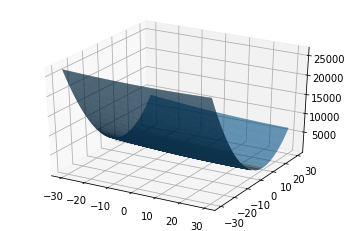

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(list_th0, list_th1, list_J)

plt.show()


# Plotting the model parameters [3pt]


1. the value of the model parameters $$\theta_0\,and\,\theta_1$$​ at every optimization step (in red θ_0 and blue θ_1​)
2. the optimization should be performed until convergence

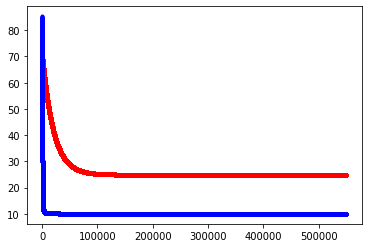

24.907393294017762 9.934635539222944 27.467506725904556


In [9]:
plt.plot(th0_log,'r.')
plt.plot(th1_log,'b.')
plt.show()

print(th0_log[-1], th1_log[-1], J_log[-2])